# **Data cleaning**

### Objectives
- Clean the `.csv` raw data from Kaggle. Data cleaning is necessary for data visualization and for machine learning model training.

### Inputs
- This file cleans the `.csv` file `Train_data.scv`, located in the `data/raw` folder.

### Outputs
- The file will be saved after the cleaning process in the `data/clean` folder. This cleaned data will be further used in data visualization, statistical analysis, machine learning models and the dashboard.

## Load the libraries and the data
We will need pandas for data manipulation and matplotlib for simple visualizations

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

Let's load the file as `df`:

In [104]:
df = pd.read_csv("../data/raw/Train_data.csv")
print(df.shape)
df.head()

(25192, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Data cleaning

### Check for uniqueness
Here I will check whether all rows are unique:

In [105]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


As you can see all the values are unique. Even if they weren't it would only mean ant they share features with the same value, not that they refer to the same intrusion since we don't have unique IDs.

### Check for null values
Here we will check whether all columns are filled:

In [106]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

As you can see there are no null values in any category.

### Check for data types and unique categories
First let's see the data info for both tables to confirm they have the same features:

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

As you can see, here is very little categorical data (`object`), with most features having `int64` type.

let's look at all the possible values in the object column:

In [108]:
categories = ['protocol_type', 'service', 'flag', 'class']

print("Object columns:\n")
for col in categories:
    print(f"{col}: {df[col].unique()}\n")

Object columns:

protocol_type: ['tcp' 'udp' 'icmp']

service: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']

flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']

class: ['normal' 'anomaly']



Furthermore we will check whether there are any quasi-categorical values which have a data type `int64` but have few unique values. We suspect that there might be some binary values for instance.

In [109]:
cols_with_few_uniques = []

# Search for int64 columns with less 10 or less unique values
# assuming your DataFrame is called df
cols_with_few_uniques = []
cols_with_many_uniques = []

for col in df.select_dtypes(include='int64').columns:
    unique_count = df[col].nunique()
    if unique_count <= 10:
        cols_with_few_uniques.append((col, unique_count))
    else:
        cols_with_many_uniques.append((col, unique_count))

# Print the results
if cols_with_few_uniques:
    print("Integer columns with 10 or fewer unique values:")
    for col, unique_count in cols_with_few_uniques:
        print(f" - {col}: {unique_count} unique values: {df[col].unique()}")
else:
    print("No int64 columns with 10 or fewer unique values found.")

Integer columns with 10 or fewer unique values:
 - land: 2 unique values: [0 1]
 - wrong_fragment: 3 unique values: [0 3 1]
 - urgent: 2 unique values: [0 1]
 - num_failed_logins: 5 unique values: [0 2 1 3 4]
 - logged_in: 2 unique values: [0 1]
 - root_shell: 2 unique values: [0 1]
 - su_attempted: 3 unique values: [0 1 2]
 - num_shells: 2 unique values: [0 1]
 - num_access_files: 7 unique values: [0 1 2 3 5 4 8]
 - num_outbound_cmds: 1 unique values: [0]
 - is_host_login: 1 unique values: [0]
 - is_guest_login: 2 unique values: [0 1]


In summary we can group our columns into four types:

In [110]:
# Also next to the numerical category there is a number of unique values
print("Continuous (float64):")
print(list(df.select_dtypes(include='float64').columns))
print('\n')

print("Categorical:")
print(list(df.select_dtypes(include='object').columns))
print('\n')

print("Whole numbers (int64):")
print(cols_with_many_uniques)
print('\n')

print("Numerical categories (int64):")
print(cols_with_few_uniques)
print('\n')

Continuous (float64):
['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


Categorical:
['protocol_type', 'service', 'flag', 'class']


Whole numbers (int64):
[('duration', 758), ('src_bytes', 1665), ('dst_bytes', 3922), ('hot', 22), ('num_compromised', 28), ('num_root', 28), ('num_file_creations', 20), ('count', 466), ('srv_count', 414), ('dst_host_count', 256), ('dst_host_srv_count', 256)]


Numerical categories (int64):
[('land', 2), ('wrong_fragment', 3), ('urgent', 2), ('num_failed_logins', 5), ('logged_in', 2), ('root_shell', 2), ('su_attempted', 3), ('num_shells', 2), ('num_access_files', 7), ('num_outbound_cmds', 1), ('is_host_login', 1), ('is_guest_login', 2)]




### Get rid of the superfluous columns
Since we know that both `'num_outbound_cmds'` and `'is_host_login'` have only one value (`0`) We can get rid of them to decrease unnecessary complexity of the data.

In [111]:
df.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace=True)
df.shape

(25192, 40)

### Combine services into broader categories
It will be hard to work on so many categories, so we will create a new column service_category that groups these services:

In [112]:
# Define mapping from service name to broader category
service_mapping = {
    # Web
    'http': 'Web', 'http_443': 'Web', 'http_8001': 'Web', 'gopher': 'Web',
    
    # File Transfer
    'ftp': 'File_Transfer', 'ftp_data': 'File_Transfer', 'tftp_u': 'File_Transfer',
    'uucp': 'File_Transfer', 'uucp_path': 'File_Transfer', 'efs': 'File_Transfer',
    
    # Email / Messaging
    'smtp': 'Email', 'imap4': 'Email', 'pop_2': 'Email', 'pop_3': 'Email',
    'nntp': 'Email', 'courier': 'Email', 'csnet_ns': 'Email',
    
    # Remote Access / Login
    'telnet': 'Remote_Access', 'ssh': 'Remote_Access', 'rlogin': 'Remote_Access',
    'klogin': 'Remote_Access', 'kshell': 'Remote_Access', 'login': 'Remote_Access',
    'exec': 'Remote_Access', 'shell': 'Remote_Access',
    
    # Name / Directory / Network Management
    'domain': 'Network_Services', 'domain_u': 'Network_Services', 'ldap': 'Network_Services',
    'netbios_ns': 'Network_Services', 'netbios_dgm': 'Network_Services',
    'netbios_ssn': 'Network_Services', 'whois': 'Network_Services', 'sunrpc': 'Network_Services',
    'ntp_u': 'Network_Services', 'time': 'Network_Services', 'daytime': 'Network_Services',
    'netstat': 'Network_Services', 'hostnames': 'Network_Services', 'link': 'Network_Services',
    
    # Infrastructure / Routing / System
    'bgp': 'System_Infrastructure', 'iso_tsap': 'System_Infrastructure',
    'vmnet': 'System_Infrastructure', 'sql_net': 'System_Infrastructure',
    'eco_i': 'System_Infrastructure', 'mtp': 'System_Infrastructure',
    'systat': 'System_Infrastructure',
    
    # Diagnostic / Utility
    'echo': 'Diagnostics', 'discard': 'Diagnostics', 'pm_dump': 'Diagnostics',
    'ctf': 'Diagnostics', 'tim_i': 'Diagnostics', 'urh_i': 'Diagnostics',
    'urp_i': 'Diagnostics', 'red_i': 'Diagnostics',
    
    # Specialized / Legacy / Other
    'finger': 'Other', 'supdup': 'Other', 'printer': 'Other', 'rje': 'Other',
    'Z39_50': 'Other', 'IRC': 'Other', 'X11': 'Other', 'private': 'Other',
    'other': 'Other', 'name': 'Other', 'ecr_i': 'Other'
}

# Create new column
df['service_category'] = df['service'].map(service_mapping).fillna('Unknown')

# Preview
print(df['service_category'].unique())
df[['service', 'service_category']].head()

['File_Transfer' 'Other' 'Web' 'Unknown' 'Network_Services'
 'System_Infrastructure' 'Remote_Access' 'Email' 'Diagnostics']


,service,service_category
0,ftp_data,File_Transfer
1,other,Other
2,private,Other
3,http,Web
4,http,Web


So now we combined services into 10 main categories.

### Target value distribution
We will look briefly at the `class` column to see how the target value is distributed:

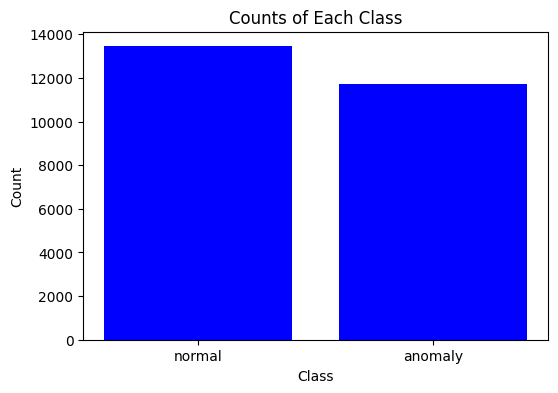

In [113]:
plt.figure(figsize=(6,4))
plt.bar(df['class'].value_counts().index, df['class'].value_counts().values, color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Each Class')
plt.show()

This clearly shows that the data for target value is quite balanced.

### Numerical data distribution
Here we will explore the distribution of numerical data by graphing in on a box plot. Let's start with continuous float variables:

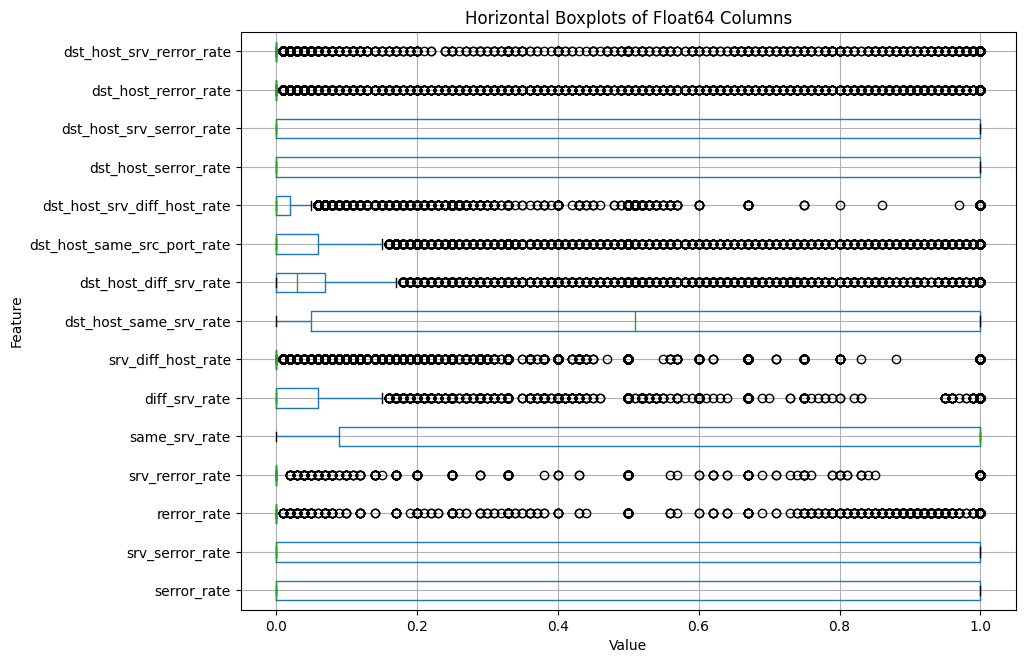

In [114]:
# Select only float64 columns
float_cols = df.select_dtypes(include='float64')

plt.figure(figsize=(10, len(float_cols.columns) * 0.5))  # dynamic height
float_cols.boxplot(vert=False)  # vert=False makes it horizontal
plt.title("Horizontal Boxplots of Float64 Columns")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.show()

We can see straightaway that none of the columns are normally distributed. We can also see all outliers are caused by the data being heavily right skewed. In most cases such as `rerror_rate` most values are **0** and only a few have non-zero value. Nevertheless they should not be discarded because these nonzero values are crucial for understanding whether the intrusion is normal or anomalous.

Let's next look at the numerical variables. I will deliberately exclude the ones that have categorical nature (i.e. have less than 10 unique values). We will plot all boxplots this time separately because `'src_bytes'`, `'dst_bytes'` and `duration` are quite anomalous compared to other columns in terms of their data distribution, and the boxplot of all of these columns together would be unreadable.

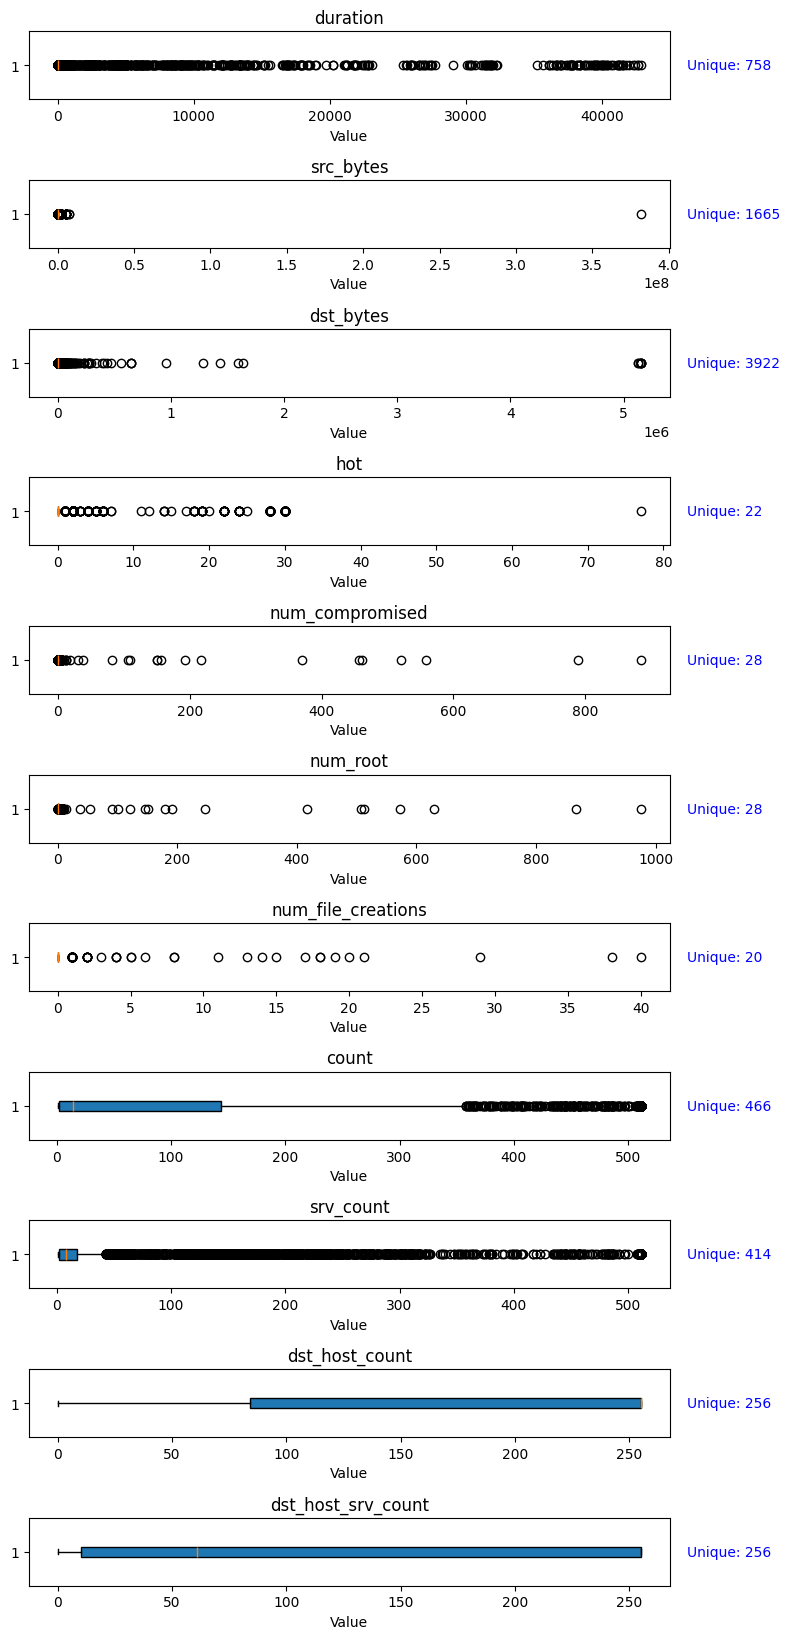

In [115]:
cols = [x[0] for x in cols_with_many_uniques]      # column names
unique_counts = [x[1] for x in cols_with_many_uniques]  # number of unique values

# Determine number of rows for subplots (one column)
n = len(cols)
fig, axes = plt.subplots(n, 1, figsize=(8, n*1.5))  # height 2 per plot for readability

# If there's only one subplot, axes is not an array, so make it iterable
if n == 1:
    axes = [axes]

# Loop through columns and plot each separately
for i, col in enumerate(cols):
    ax = axes[i]
    ax.boxplot(df[col], vert=False, patch_artist=True)
    ax.set_title(col)
    ax.set_xlabel("Value")

    # Annotate number of unique values near the max of the data
    max_val = df[col].max()
    text_x = max_val + 0.08 * (df[col].max() - df[col].min())  # 2% beyond the range
    ax.text(text_x, 1, f'Unique: {unique_counts[i]}', va='center', ha='left', color='blue')

plt.tight_layout()
plt.show()

Again we can see that the data is not normally distributed and that in many cases the mode is 0. Again we presume that these non-zero values and other outliers will be crucial to understand anomalous intrusions.

## Save the cleaned data
The data will be saved in the `data/clean` folder. We will also remove the index assigned automatically by pandas.

In [116]:
df.to_csv("../data/clean/network-intrusions-clean.csv", index=False)

We want to display the cleaned data to analyse how to label all the columns and categorical values in a more readable way

In [117]:
# Create summary table
summary = []

for col in df.columns:
    dtype = df[col].dtype
    n_unique = df[col].nunique()
    if dtype == 'object':
        unique_vals = df[col].unique()
        unique_display = ', '.join([str(v) for v in unique_vals])
    else:
        # For numerical columns, show up to 10 unique values
        unique_vals = df[col].unique()[:10]
        unique_display = ', '.join([str(v) for v in unique_vals])
    summary.append({
        'Column': col,
        'Type': str(dtype),
        'Unique Count': n_unique,
        'Unique Values': unique_display
    })

summary_df = pd.DataFrame(summary)
# Display as a table
from IPython.display import display
display(summary_df)

,Column,Type,Unique Count,Unique Values
0,duration,int64,758,"0, 5607, 507, 1, 2, 9052, 315, 1082, 25950, 240"
1,protocol_type,object,3,"tcp, udp, icmp"
2,service,object,66,"ftp_data, other, private, http, remote_job, na..."
3,flag,object,11,"SF, S0, REJ, RSTR, SH, RSTO, S1, RSTOS0, S3, S..."
4,src_bytes,int64,1665,"491, 146, 0, 232, 199, 287, 334, 300, 18, 233"
5,dst_bytes,int64,3922,"0, 8153, 420, 2251, 13788, 616, 1178, 11905, 1..."
6,land,int64,2,"0, 1"
7,wrong_fragment,int64,3,"0, 3, 1"
8,urgent,int64,2,"0, 1"
9,hot,int64,22,"0, 5, 6, 4, 2, 1, 28, 30, 22, 24"


We will map and rename all columns and categorical values so they will be easier to visualise in out power bi dashboard and will be readable and understandable for non-technical audience

In [118]:
# Example: Mapping for column names
column_rename_map = {
    'duration': 'Connection Duration',
    'protocol_type': 'Protocol',
    'service': 'Service Type',
    'flag': 'Connection Flag',
    'src_bytes': 'Source Bytes',
    'dst_bytes': 'Destination Bytes',
    'land': 'Land Attack',
    'wrong_fragment': 'Wrong Fragment Count',
    'urgent': 'Urgent Packets',
    'hot': 'Hot Indicators',
    'num_failed_logins': 'Failed Logins',
    'logged_in': 'Logged In',
    'num_compromised': 'Compromised Accounts',
    'root_shell': 'Root Shell Access',
    'su_attempted': 'SU Attempted',
    'num_root': 'Root Access Count',
    'num_file_creations': 'File Creations',
    'num_shells': 'Shells Opened',
    'num_access_files': 'Accessed Files',
    'num_outbound_cmds': 'Outbound Commands',
    'is_host_login': 'Host Login',
    'is_guest_login': 'Guest Login',
    'count': 'Connection Count',
    'srv_count': 'Service Count',
    'serror_rate': 'SYN Error Rate',
    'srv_serror_rate': 'Service SYN Error Rate',
    'rerror_rate': 'REJ Error Rate',
    'srv_rerror_rate': 'Service REJ Error Rate',
    'same_srv_rate': 'Same Service Rate',
    'diff_srv_rate': 'Different Service Rate',
    'srv_diff_host_rate': 'Service Different Host Rate',
    'dst_host_count': 'Destination Host Count',
    'dst_host_srv_count': 'Destination Host Service Count',
    'dst_host_same_srv_rate': 'Destination Host Same Service Rate',
    'dst_host_diff_srv_rate': 'Destination Host Different Service Rate',
    'dst_host_same_src_port_rate': 'Destination Host Same Source Port Rate',
    'dst_host_srv_diff_host_rate': 'Destination Host Service Different Host Rate',
    'dst_host_serror_rate': 'Destination Host SYN Error Rate',
    'dst_host_srv_serror_rate': 'Destination Host Service SYN Error Rate',
    'dst_host_rerror_rate': 'Destination Host REJ Error Rate',
    'dst_host_srv_rerror_rate': 'Destination Host Service REJ Error Rate',
    'class': 'Intrusion Type',
    'service_category': 'Service Category' 
}

# Example: Mapping for categorical values
protocol_map = {
    'tcp': 'TCP',
    'udp': 'UDP',
    'icmp': 'ICMP'
}

# Expanded mapping for Service Type to be more readable
service_map = {
    'http': 'HTTP',
    'ftp': 'FTP',
    'smtp': 'SMTP',
    'ftp_data': 'FTP Data',
    'http_443': 'HTTP 443',
    'http_8001': 'HTTP 8001',
    'gopher': 'Gopher',
    'tftp_u': 'TFTP',
    'uucp': 'UUCP',
    'uucp_path': 'UUCP Path',
    'efs': 'EFS',
    'imap4': 'IMAP4',
    'pop_2': 'POP2',
    'pop_3': 'POP3',
    'nntp': 'NNTP',
    'courier': 'Courier',
    'csnet_ns': 'CSNET NS',
    'telnet': 'Telnet',
    'ssh': 'SSH',
    'rlogin': 'Rlogin',
    'klogin': 'Klogin',
    'kshell': 'Kshell',
    'login': 'Login',
    'exec': 'Exec',
    'shell': 'Shell',
    'domain': 'Domain',
    'domain_u': 'Domain U',
    'ldap': 'LDAP',
    'netbios_ns': 'NetBIOS NS',
    'netbios_dgm': 'NetBIOS DGM',
    'netbios_ssn': 'NetBIOS SSN',
    'whois': 'Whois',
    'sunrpc': 'SunRPC',
    'ntp_u': 'NTP',
    'time': 'Time',
    'daytime': 'Daytime',
    'netstat': 'Netstat',
    'hostnames': 'Hostnames',
    'link': 'Link',
    'bgp': 'BGP',
    'iso_tsap': 'ISO TSAP',
    'vmnet': 'VMNet',
    'sql_net': 'SQL Net',
    'eco_i': 'ECO',
    'mtp': 'MTP',
    'systat': 'Systat',
    'echo': 'Echo',
    'discard': 'Discard',
    'pm_dump': 'PM Dump',
    'ctf': 'CTF',
    'tim_i': 'TIM',
    'urh_i': 'URH',
    'urp_i': 'URP',
    'red_i': 'RED',
    'finger': 'Finger',
    'supdup': 'Supdup',
    'printer': 'Printer',
    'rje': 'RJE',
    'Z39_50': 'Z39.50',
    'IRC': 'IRC',
    'X11': 'X11',
    'private': 'Private',
    'other': 'Other',
    'name': 'Name',
    'ecr_i': 'ECR',
    # Add any other service types as needed
}

flag_map = {
    'SF': 'Normal Connection',
    'REJ': 'Rejected Connection',
    'S0': 'No Response',
    # Add all other flag types as needed
}

class_map = {
    'normal': 'Normal Activity',
    'anomaly': 'Anomalous Activity',
    # Add all other class labels as needed
}

# Create a copy of the DataFrame
df_readable = df.copy()

# Rename columns
df_readable.rename(columns=column_rename_map, inplace=True)

# Replace categorical values
df_readable['Protocol'] = df_readable['Protocol'].replace(protocol_map)
df_readable['Service Type'] = df_readable['Service Type'].replace(service_map)
df_readable['Connection Flag'] = df_readable['Connection Flag'].replace(flag_map)
df_readable['Intrusion Type'] = df_readable['Intrusion Type'].replace(class_map)

# Replace underscores with spaces in all string columns
for col in df_readable.select_dtypes(include='object').columns:
    df_readable[col] = df_readable[col].str.replace('_', ' ', regex=False)

# Now df_readable is ready for export or visualization

Also, we group all variables into relevant category 

In [119]:
# Create summary table for df_readable with group info (column name, group name, unique values for categorical only)
summary = []
for col in df_readable.columns:
    dtype = df_readable[col].dtype
    group = group_map.get(col, 'Miscellaneous')
    if dtype == 'object':
        unique_vals = df_readable[col].unique()
        unique_display = ', '.join([str(v) for v in unique_vals])
        summary.append({
            'Column': col,
            'Group': group,
            'Unique Values': unique_display
        })
    else:
        summary.append({
            'Column': col,
            'Group': group,
            'Unique Values': ''
        })
summary_df = pd.DataFrame(summary)
from IPython.display import display
display(summary_df)

,Column,Group,Unique Values
0,Connection Duration,Basic Connection Info,
1,Protocol,Basic Connection Info,"TCP, UDP, ICMP"
2,Service Type,Basic Connection Info,"FTP Data, Other, Private, HTTP, remote job, Na..."
3,Connection Flag,Basic Connection Info,"Normal Connection, No Response, Rejected Conne..."
4,Source Bytes,Traffic Volume,
5,Destination Bytes,Traffic Volume,
6,Land Attack,Attack Indicators,
7,Wrong Fragment Count,Fragmentation/Urgency,
8,Urgent Packets,Fragmentation/Urgency,
9,Hot Indicators,Suspicious Activity Indicators,


In [120]:
# Create a mapping from group to list of columns
from collections import defaultdict

group_to_columns = defaultdict(list)
for col in df_readable.columns:
    group = group_map.get(col, 'Miscellaneous')
    group_to_columns[group].append(col)

# Convert to DataFrame for display: each group is a column, values are feature names
group_table = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in group_to_columns.items()]))

# Display and export
display(group_table)
group_table.to_csv("../data/clean/network-intrusions-groups-table.csv", index=False)

,Basic Connection Info,Traffic Volume,Attack Indicators,Fragmentation/Urgency,Suspicious Activity Indicators,Login/Authentication,File/Shell Activity,Host/Service Counts,Error Rates,Service Diversity,Target/Label,Miscellaneous
0,Connection Duration,Source Bytes,Land Attack,Wrong Fragment Count,Hot Indicators,Failed Logins,File Creations,Connection Count,SYN Error Rate,Same Service Rate,Intrusion Type,Service Category
1,Protocol,Destination Bytes,NaN,Urgent Packets,NaN,Logged In,Shells Opened,Service Count,Service SYN Error Rate,Different Service Rate,NaN,NaN
2,Service Type,NaN,NaN,NaN,NaN,Compromised Accounts,Accessed Files,Destination Host Count,REJ Error Rate,Service Different Host Rate,NaN,NaN
3,Connection Flag,NaN,NaN,NaN,NaN,Root Shell Access,NaN,Destination Host Service Count,Service REJ Error Rate,Destination Host Same Service Rate,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,SU Attempted,NaN,NaN,Destination Host SYN Error Rate,Destination Host Different Service Rate,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Root Access Count,NaN,NaN,Destination Host Service SYN Error Rate,Destination Host Same Source Port Rate,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Guest Login,NaN,NaN,Destination Host REJ Error Rate,Destination Host Service Different Host Rate,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destination Host Service REJ Error Rate,NaN,NaN,NaN


Lastly, save the labeled data to network-intrusions-labels.csv

In [121]:
df_readable.to_csv("../data/clean/network-intrusions-labels.csv", index=False)